Importing Python Libraries for EDA

1.   NUMPY
2.   Pandas
3.   Matplotlib
4.   Seaborn




In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

Importing DATASET using PANDAS READ CSV



In [ ]:
df = pd.read_csv('/content/Crimes_In_India_2001_2012.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [ ]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
df.shape

(9017, 33)

Cleaning Data by removing Row named "TOTAL" and creating New dataset

In [ ]:
dfs = df[df['DISTRICT'].str.contains('TOTAL')==False]

In [ ]:
dfs.shape

(8597, 33)

In [ ]:
print(dfs['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']


Grouping dataset by STATE/UT and ploting it againt TOTAL IPC CRIMES to find which State / UT has highest Crime from 2001 to 2012

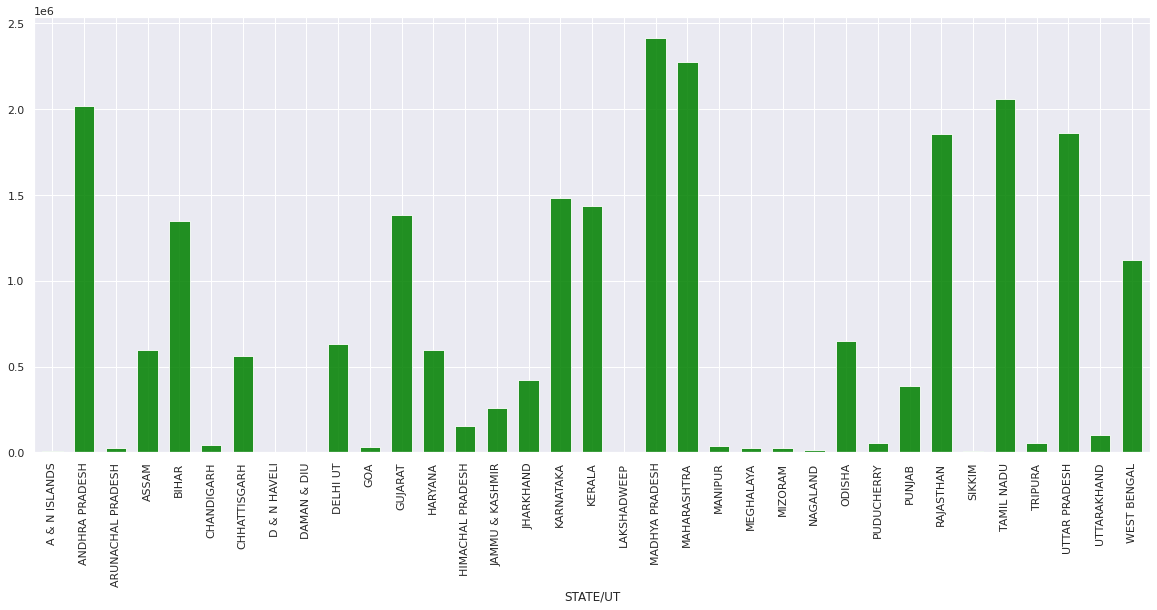

In [14]:
dt = dfs.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
dt.plot(kind = 'bar', color = 'green', alpha = 0.86, width = 0.65)

In [ ]:
ds = dfs[['STATE/UT','TOTAL IPC CRIMES']].copy()
ds.head()

,STATE/UT,TOTAL IPC CRIMES
0,ANDHRA PRADESH,4154
1,ANDHRA PRADESH,4125
2,ANDHRA PRADESH,5818
3,ANDHRA PRADESH,3140
4,ANDHRA PRADESH,6507


In [ ]:
ds.sort_values(by = 'TOTAL IPC CRIMES', ascending = False, inplace = True)
ds.head()

,STATE/UT,TOTAL IPC CRIMES
7738,KERALA,34638
7044,MAHARASHTRA,33932
5504,MAHARASHTRA,32770
7829,MAHARASHTRA,32647
6145,KARNATAKA,32380


Sorting data in descending order and ploting top 10 to find states with highest CRIME

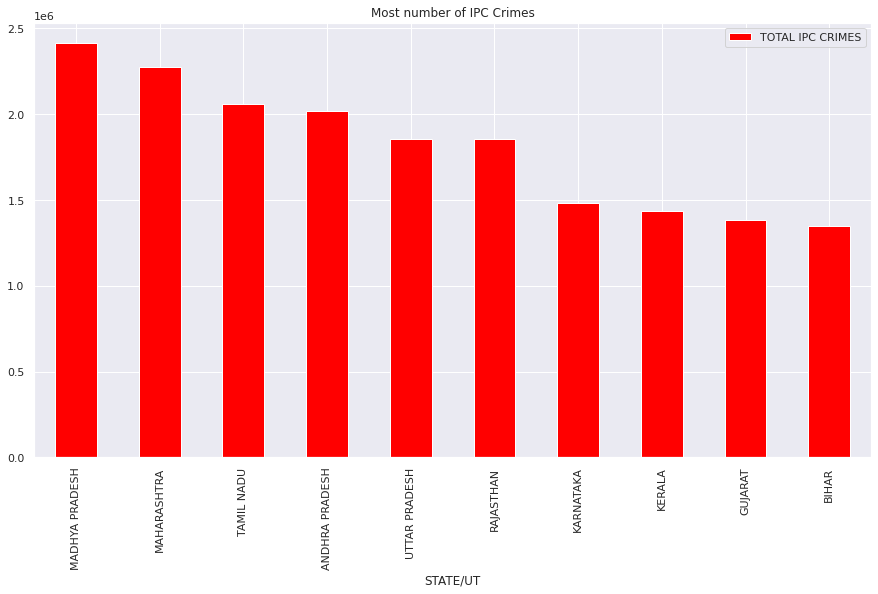

In [61]:
dss = ds.groupby('STATE/UT', sort = False).sum()
dsss = dss.sort_values(by = 'TOTAL IPC CRIMES', ascending = False)
dsss.head(10).plot(kind = 'bar', color = 'red', figsize = (15,8), title = "Most number of IPC Crimes")

Creating a new data set containg all crimes against women and Children. Summing them to make a new column that contains sum of all crimes

In [16]:
dn = dfs[['STATE/UT', 'YEAR', 'RAPE', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']].copy()
dn['Crime Against Women'] = dn['RAPE']+dn['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']+dn['DOWRY DEATHS']+dn['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']+dn['INSULT TO MODESTY OF WOMEN']+dn['CRUELTY BY HUSBAND OR HIS RELATIVES']+dn['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']
dn.head()

,STATE/UT,YEAR,RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,Crime Against Women
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0,475


Ploting the new dataset to find state with maximum number of crime against women

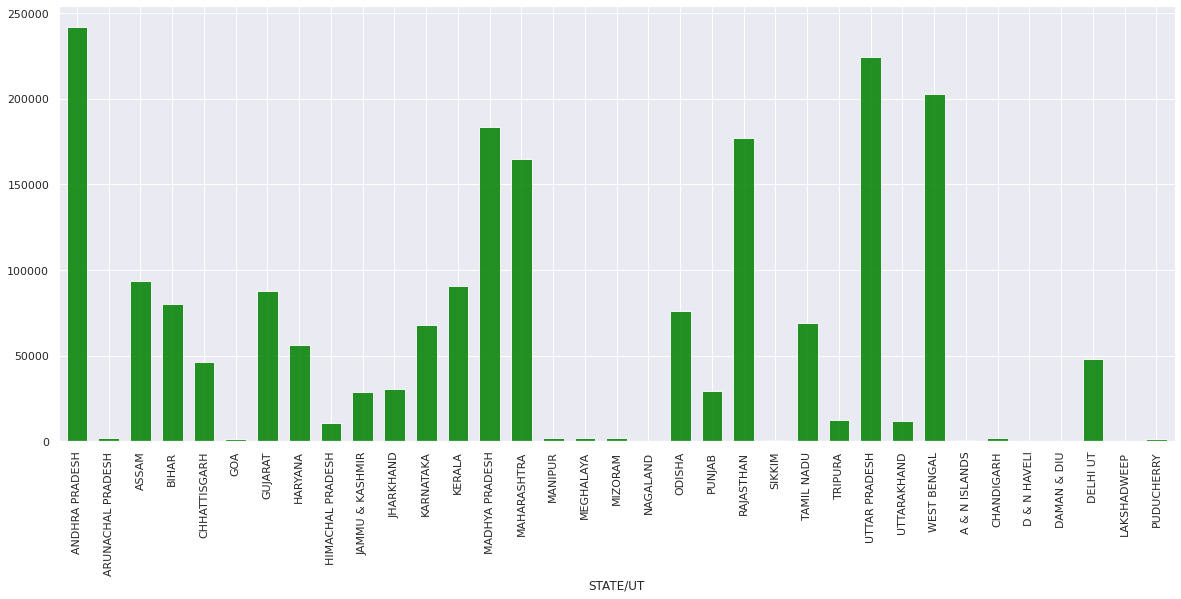

In [17]:
dns = dn.groupby('STATE/UT', sort = False)['Crime Against Women'].sum()
sns.set()
plt.figure(figsize=(20, 8))
dns.plot(kind = 'bar', color = 'green', alpha = 0.86, width = 0.65)

In [67]:
maxValues = dns.max(axis=0)
print(maxValues)

241784


Max crime against women is in State of ANDRA PRADESH

Creating Seperate Dataset for Andra Pradesh, West Bengal and Uttar Pradesh for year 2001 and 2004 and plotting them aginst Total IPC Crime in respecting year.

In [21]:
df_Andra = dfs[dfs['STATE/UT'].str.contains('ANDHRA PRADESH')==True]
df_Andra_2001 = df_Andra[df_Andra['YEAR'] <= 2001]

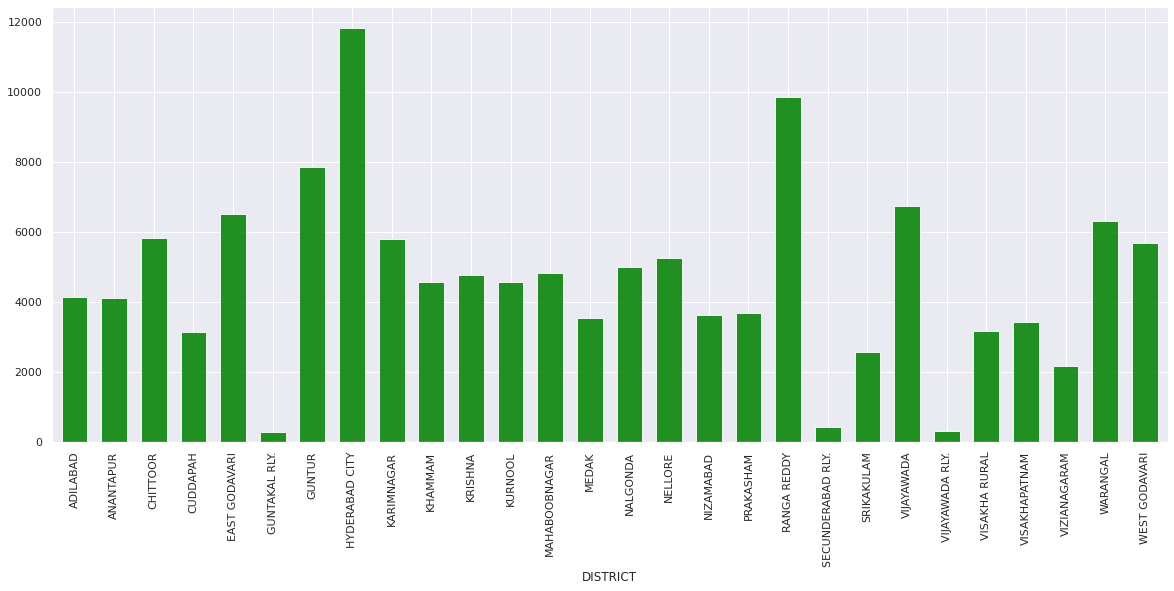

In [22]:
df_Andra_2001_plot = df_Andra_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
df_Andra_2001_plot.plot(kind = 'bar', color = 'green', alpha = 0.86, width = 0.65)

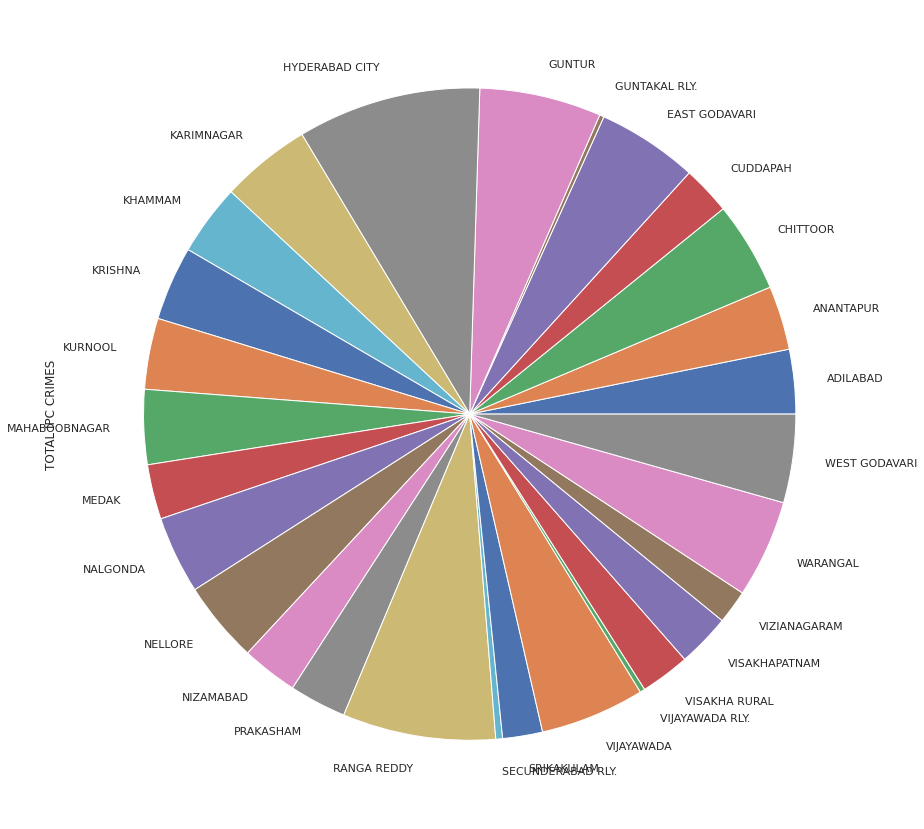

In [26]:
df_Andra_2001_plot = df_Andra_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(15, 15))
df_Andra_2001_plot.plot(kind = 'pie')

In [28]:
df_Andra_2004 = df_Andra[(df_Andra['YEAR'] >= 2004) & (df_Andra['YEAR'] < 2005)]

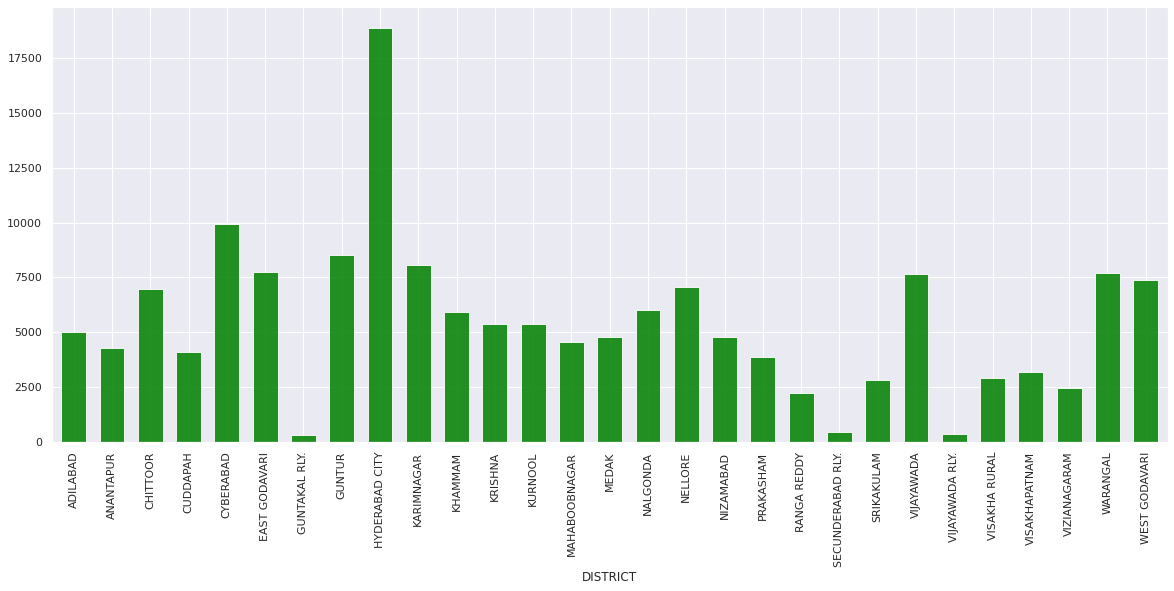

In [29]:
df_Andra_2004_plot = df_Andra_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
df_Andra_2004_plot.plot(kind = 'bar', color = 'green', alpha = 0.86, width = 0.65)

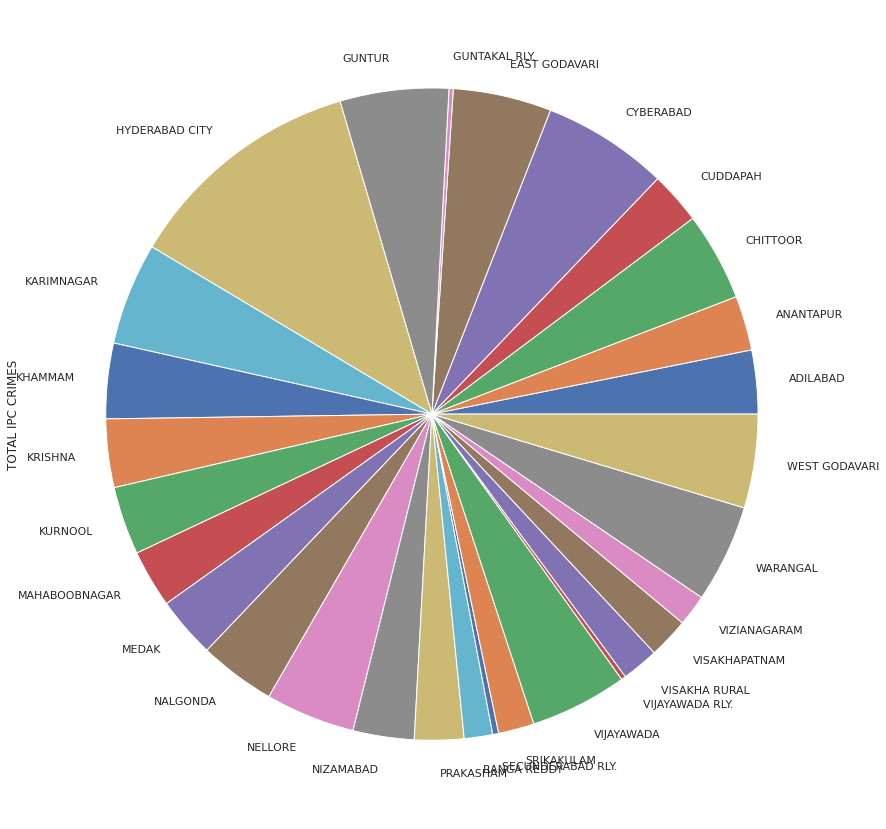

In [31]:
df_Andra_2004_plot = df_Andra_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(15, 15))
df_Andra_2004_plot.plot(kind = 'pie')

In [35]:
df_UP = dfs[dfs['STATE/UT'].str.contains('UTTAR PRADESH')==True]
df_UP_2001 = df_UP[df_UP['YEAR'] <= 2001]

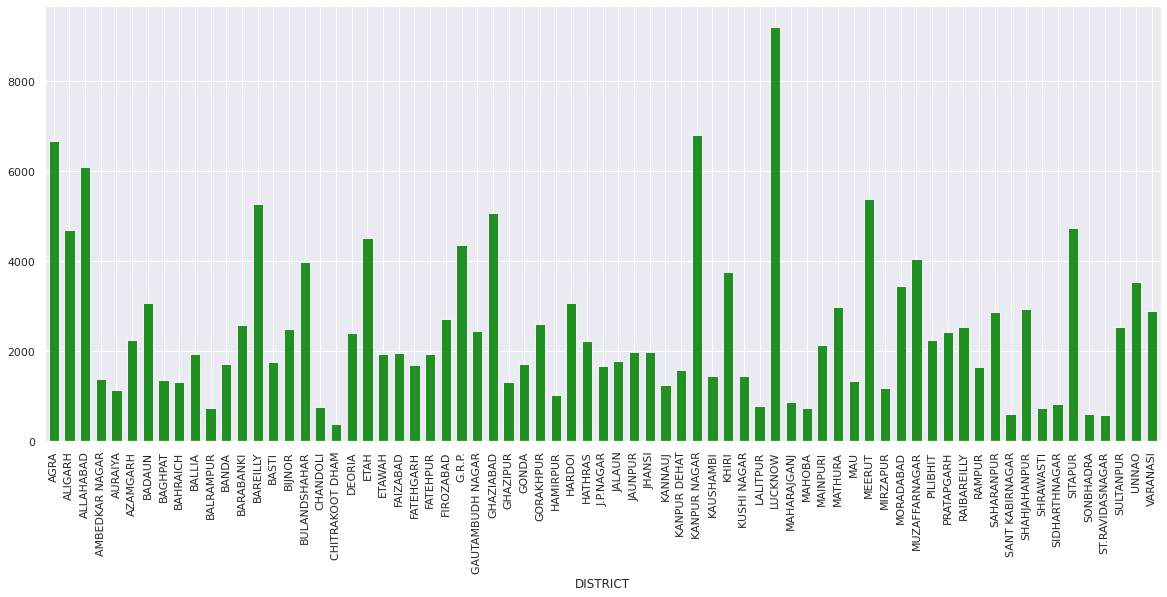

In [36]:
df_UP_2001_plot = df_UP_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
df_UP_2001_plot.plot(kind = 'bar', color = 'green', alpha = 0.86, width = 0.65)

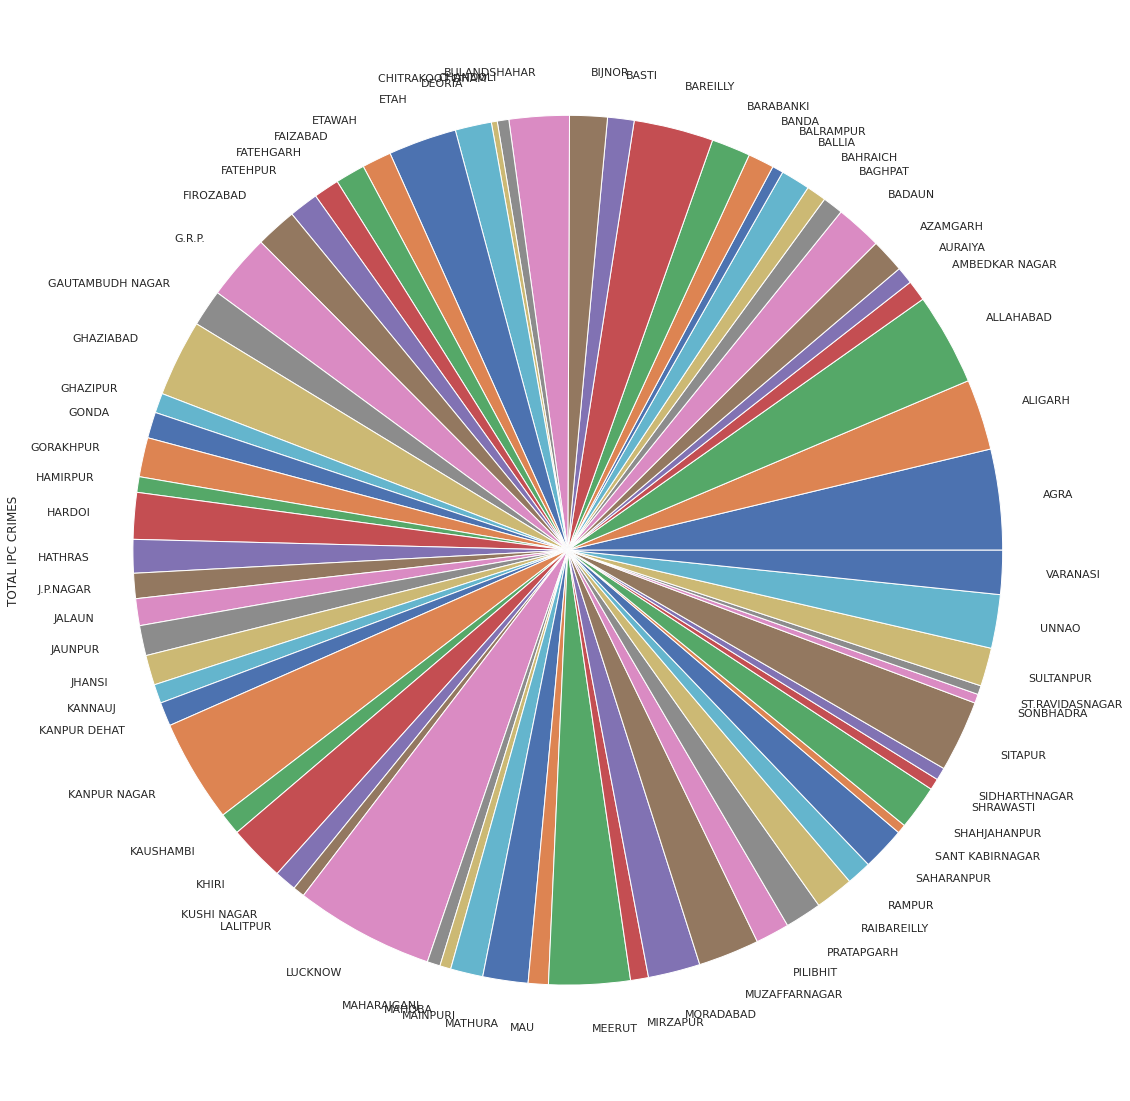

In [38]:
df_UP_2001_plot = df_UP_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 20))
df_UP_2001_plot.plot(kind = 'pie')

In [41]:
df_UP_2004 = df_UP[(df_UP['YEAR'] >= 2004) & (df_UP['YEAR'] < 2005)]

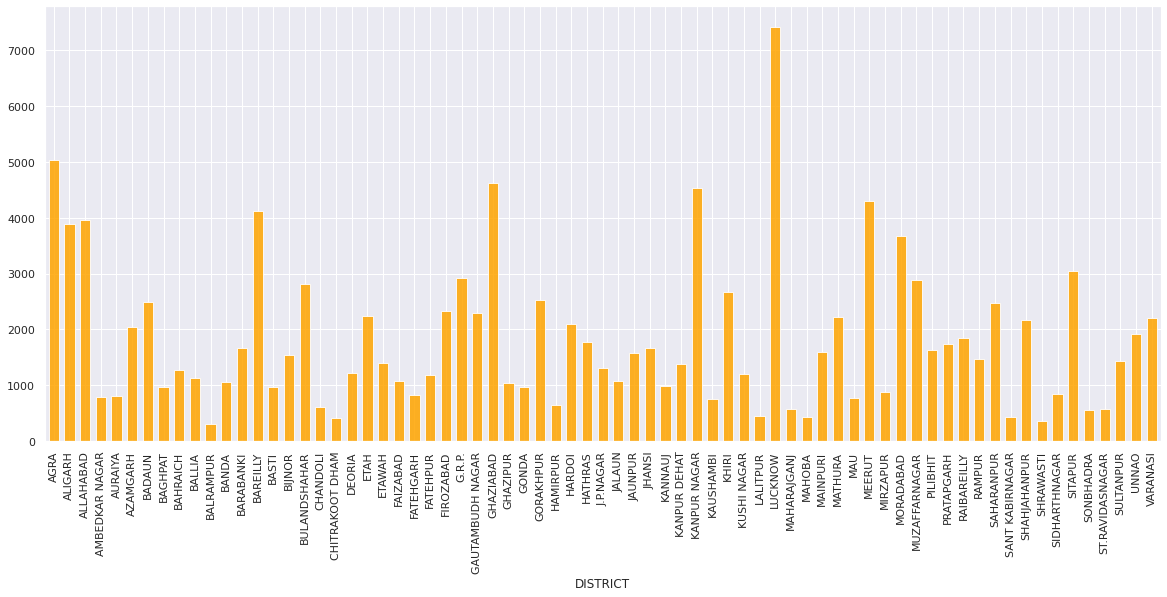

In [42]:
df_UP_2004_plot = df_UP_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
df_UP_2004_plot.plot(kind = 'bar', color = 'orange', alpha = 0.86, width = 0.65)

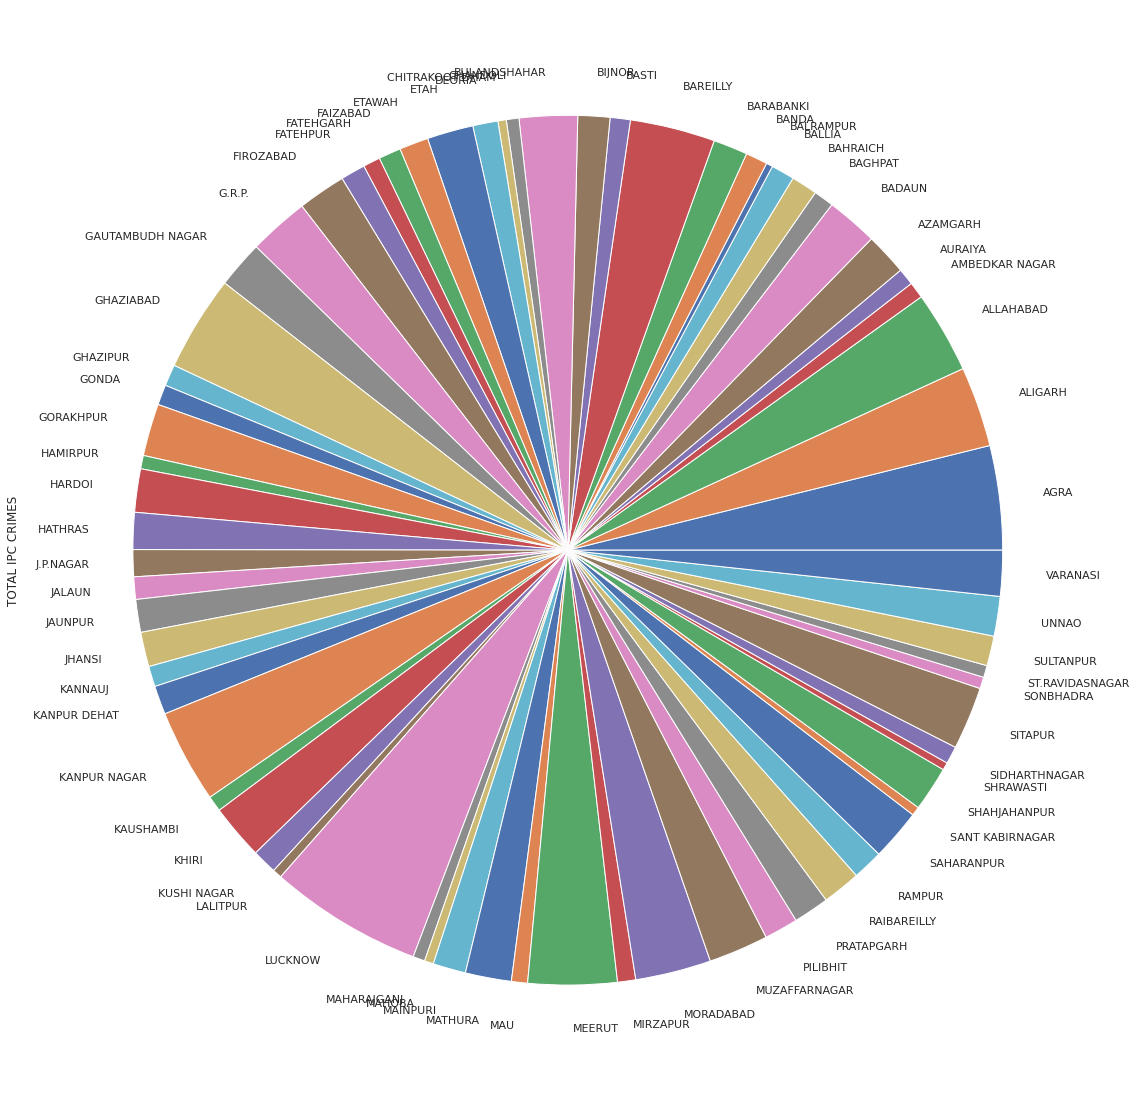

In [43]:
df_UP_2004_plot = df_UP_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 20))
df_UP_2004_plot.plot(kind = 'pie')

In [44]:
df_WB = dfs[dfs['STATE/UT'].str.contains('WEST BENGAL')==True]
df_WB_2001 = df_WB[df_WB['YEAR'] <= 2001]

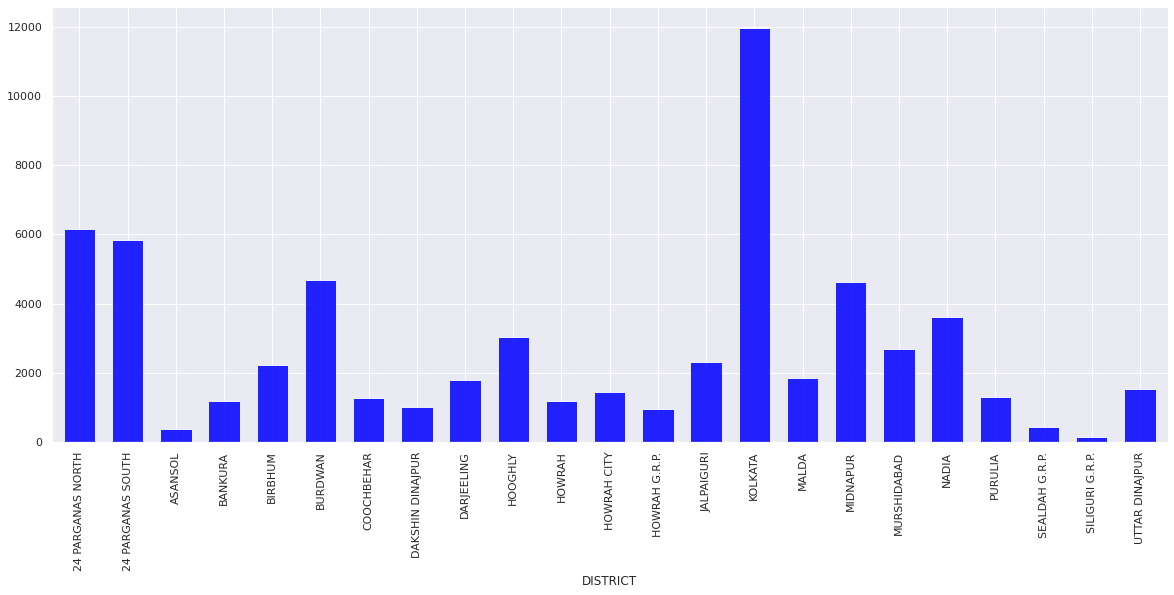

In [49]:
df_WB_2001_plot = df_WB_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
df_WB_2001_plot.plot(kind = 'bar', color = 'blue', alpha = 0.86, width = 0.65)

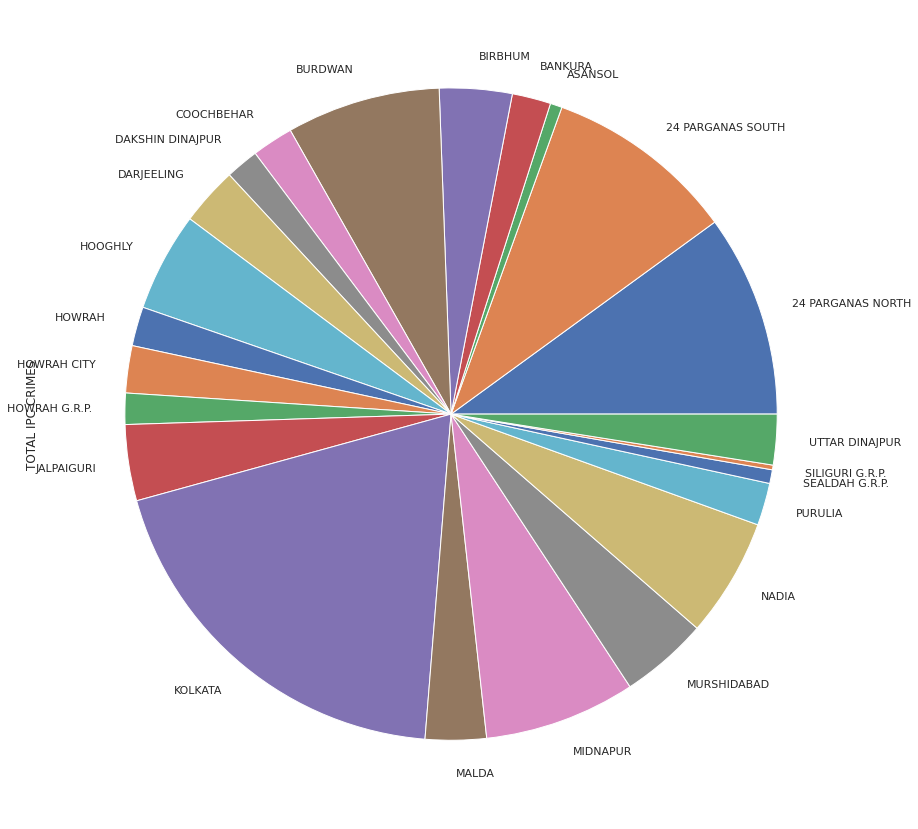

In [52]:
df_WB_2001_plot = df_WB_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(15, 15))
df_WB_2001_plot.plot(kind = 'pie')

In [54]:
df_WB_2004 = df_WB[(df_WB['YEAR'] >= 2004) & (df_WB['YEAR'] < 2005)]

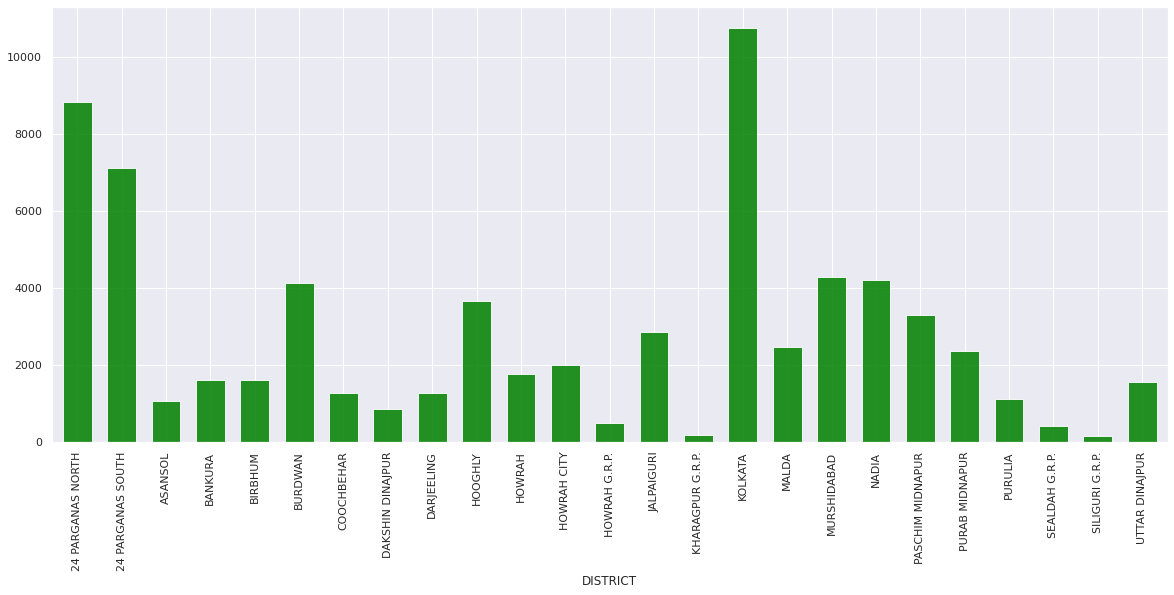

In [55]:
df_WB_2004_plot = df_WB_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
df_WB_2004_plot.plot(kind = 'bar', color = 'green', alpha = 0.86, width = 0.65)

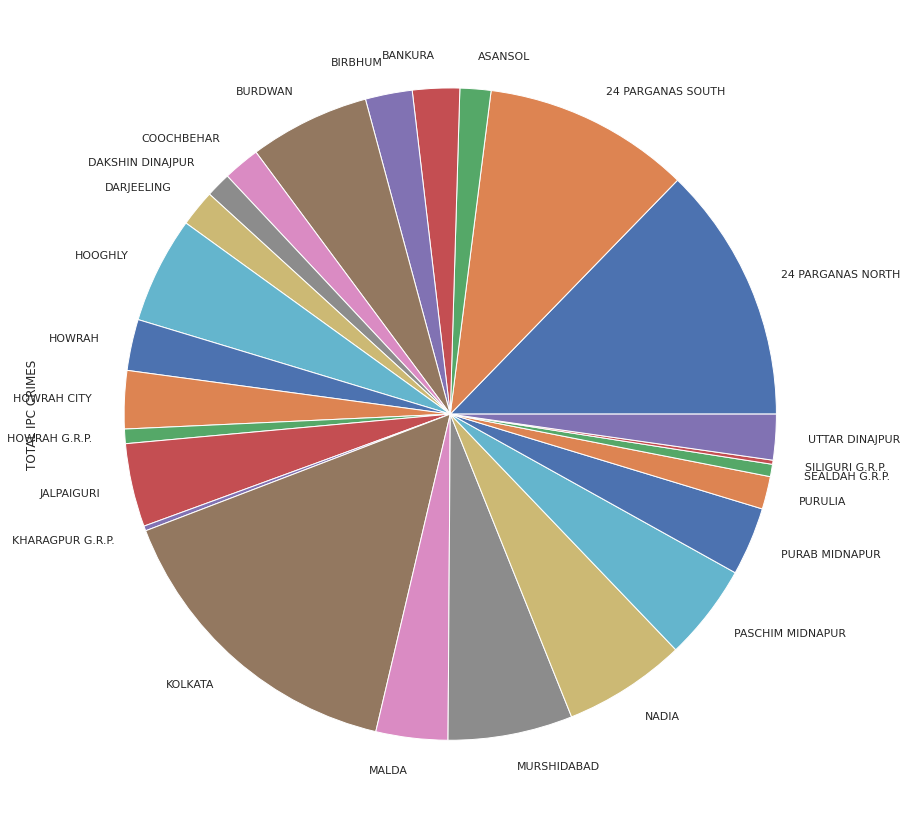

In [58]:
df_WB_2004_plot = df_WB_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(15, 15))
df_WB_2004_plot.plot(kind = 'pie')

Adding A NEW Column CRIME and Making it equal to TOAL IPC CRIMES.

In [59]:
dfs['CRIME'] = dfs['TOTAL IPC CRIMES']f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
dfs

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,6
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,227,18,53,6,327,0,292,1144,5558,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,787
